In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
opgg = pd.read_hdf('./data/total_skip3.h5', key='total', mode='r')

In [3]:
# opgg

In [4]:
opgg = opgg[['summoner.level', 'summoner.league_stats', 'summoner.most_champions.play',
                            'summoner.most_champions.win', 'summoner.most_champions.lose',
                            'summoner.most_champions.champion_stats']]

In [5]:
opgg.columns

Index(['summoner.level', 'summoner.league_stats',
       'summoner.most_champions.play', 'summoner.most_champions.win',
       'summoner.most_champions.lose',
       'summoner.most_champions.champion_stats'],
      dtype='object')

In [6]:
opgg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88128 entries, 0 to 88127
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   summoner.level                          88128 non-null  int64  
 1   summoner.league_stats                   88128 non-null  object 
 2   summoner.most_champions.play            85486 non-null  float64
 3   summoner.most_champions.win             85486 non-null  float64
 4   summoner.most_champions.lose            85486 non-null  float64
 5   summoner.most_champions.champion_stats  85486 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.7+ MB


In [7]:
opgg['summoner.league_stats'][0]

[{'queue_info': {'id': 4,
   'queue_translate': 'Ranked Solo/Duo',
   'game_type': 'SOLORANKED'},
  'tier_info': {'tier': 'CHALLENGER',
   'division': 1,
   'lp': 1030,
   'level': None,
   'tier_image_url': 'https://opgg-static.akamaized.net/images/medals_new/challenger.png',
   'border_image_url': 'https://opgg-static.akamaized.net/images/border_new/challenger.png'},
  'win': 157,
  'lose': 109,
  'is_hot_streak': False,
  'is_fresh_blood': False,
  'is_veteran': True,
  'is_inactive': False,
  'series': None,
  'updated_at': '2024-03-19T17:09:44+09:00'}]

In [8]:
pd.json_normalize(opgg['summoner.league_stats'][0])

win  lose  is_hot_streak  is_fresh_blood  is_veteran  is_inactive series  \
0  157   109          False           False        True        False   None   

                  updated_at  queue_info.id queue_info.queue_translate  \
0  2024-03-19T17:09:44+09:00              4            Ranked Solo/Duo   

  queue_info.game_type tier_info.tier  tier_info.division  tier_info.lp  \
0           SOLORANKED     CHALLENGER                   1          1030   

  tier_info.level                           tier_info.tier_image_url  \
0            None  https://opgg-static.akamaized.net/images/medal...   

                          tier_info.border_image_url  
0  https://opgg-static.akamaized.net/images/borde...

In [9]:
opgg[['summoner.most_champions.play', 'summoner.most_champions.win', 'summoner.most_champions.lose']]

summoner.most_champions.play  summoner.most_champions.win  \
0                             265.0                        157.0   
1                             263.0                        153.0   
2                             268.0                        157.0   
3                             336.0                        193.0   
4                             127.0                         88.0   
...                             ...                          ...   
88123                          58.0                         17.0   
88124                          24.0                         11.0   
88125                          43.0                          5.0   
88126                          57.0                         16.0   
88127                          27.0                          3.0   

       summoner.most_champions.lose  
0                             108.0  
1                             110.0  
2                             111.0  
3                             143.0  
4                              39.0  
...                             ...  
88123                          41.0  
88124                          13.0  
88125                          38.0  
88126                          41.0  
88127                          24.0  

[88128 rows x 3 columns]

In [10]:
pd.json_normalize(opgg['summoner.most_champions.champion_stats'][0])

id  play  win  lose  kill  death  assist  gold_earned  minion_kill  \
0  910    32   20    12   162     77     245       336651         6269   
1   18    27   16    11   149     80     138       343372         6327   
2  518    24   18     6   140     62     203       270953         4704   

   turret_kill  ...  physical_damage_taken  damage_dealt_to_champions  \
0           39  ...                 197501                     667921   
1           88  ...                 268238                     539184   
2           41  ...                 200661                     439764   

   physical_damage_dealt_to_champions  magic_damage_dealt_to_champions  \
0                               42138                           619908   
1                              463907                            63853   
2                               45942                           389272   

   damage_dealt_to_objectives  damage_dealt_to_turrets  damage_self_mitigated  \
0                      193124                   116767                 219630   
1                      512837                   297457                 396980   
2                      201367                   139257                 197013   

   max_largest_multi_kill  max_largest_critical_strike  \
0                       3                            0   
1                       3                          688   
2                       3                            0   

   max_largest_killing_spree  
0                         13  
1                         11  
2                         12  

[3 rows x 43 columns]

In [44]:
pd.json_normalize(opgg['summoner.most_champions.champion_stats'][0]).sum()

id                                        1446
play                                        83
win                                         54
lose                                        29
kill                                       451
death                                      219
assist                                     586
gold_earned                             950976
minion_kill                              17300
turret_kill                                168
neutral_minion_kill                        285
damage_dealt                          11955836
damage_taken                           1255950
physical_damage_dealt                  4842016
magic_damage_dealt                     6753125
most_kill                                   39
max_kill                                    39
max_death                                   22
double_kill                                 41
triple_kill                                  5
quadra_kill                                  0
penta_kill   

In [11]:
opgg[['summoner.level', 'summoner.most_champions.play', 'summoner.most_champions.win', 'summoner.most_champions.lose']].corr()

summoner.level  summoner.most_champions.play  \
summoner.level                      1.000000                      0.294364   
summoner.most_champions.play        0.294364                      1.000000   
summoner.most_champions.win         0.292753                      0.994550   
summoner.most_champions.lose        0.292630                      0.994088   

                              summoner.most_champions.win  \
summoner.level                                   0.292753   
summoner.most_champions.play                     0.994550   
summoner.most_champions.win                      1.000000   
summoner.most_champions.lose                     0.977349   

                              summoner.most_champions.lose  
summoner.level                                    0.292630  
summoner.most_champions.play                      0.994088  
summoner.most_champions.win                       0.977349  
summoner.most_champions.lose                      1.000000

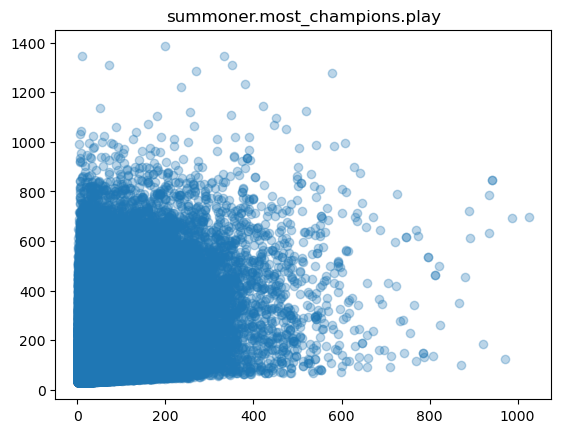

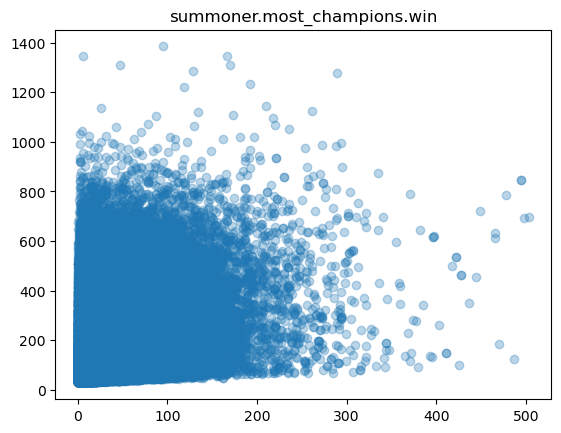

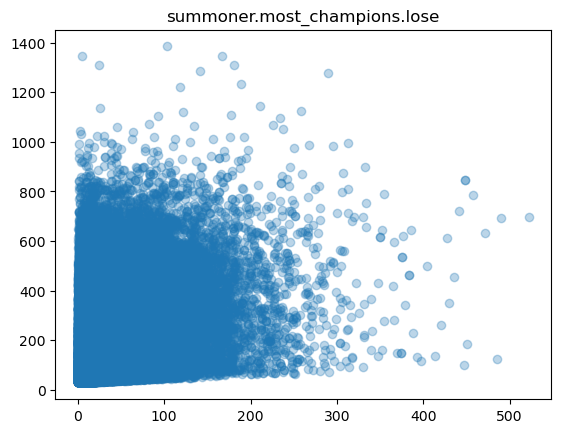

In [12]:
for col in ['summoner.most_champions.play', 'summoner.most_champions.win', 'summoner.most_champions.lose']:
    plt.scatter(opgg[col], opgg['summoner.level'], alpha=0.3)
    plt.title(col)
    plt.show()

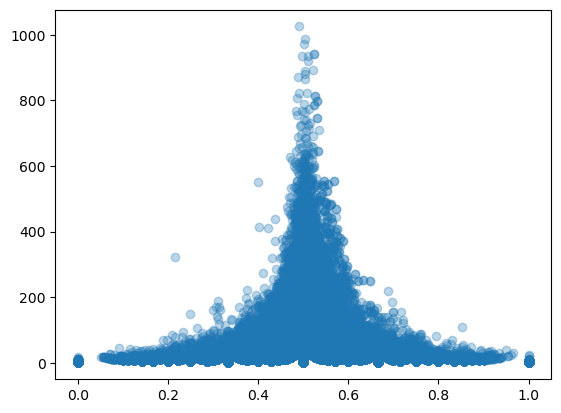

In [13]:
plt.scatter(opgg['summoner.most_champions.win']/(opgg['summoner.most_champions.win']+opgg['summoner.most_champions.lose']), opgg['summoner.most_champions.play'], alpha=0.3)
plt.show()

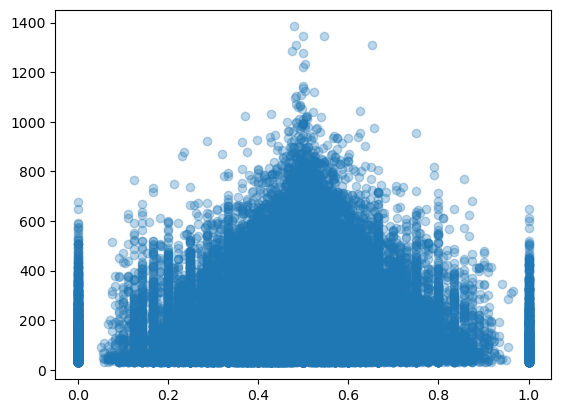

In [14]:
plt.scatter(opgg['summoner.most_champions.win']/(opgg['summoner.most_champions.win']+opgg['summoner.most_champions.lose']), opgg['summoner.level'], alpha=0.3)
plt.show()

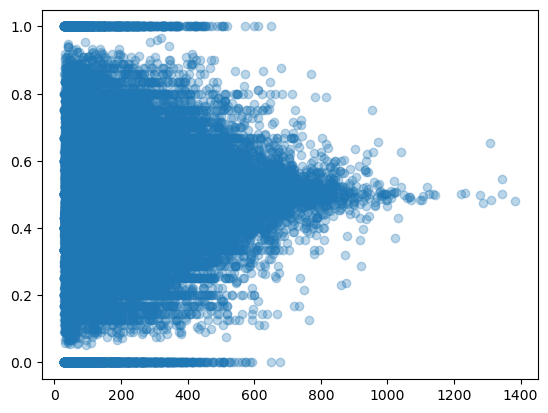

In [15]:
plt.scatter(opgg['summoner.level'],
            opgg['summoner.most_champions.win']/(opgg['summoner.most_champions.win']+opgg['summoner.most_champions.lose']),  alpha=0.3)
plt.show()

In [16]:
pd.json_normalize(opgg['summoner.league_stats'][0])

win  lose  is_hot_streak  is_fresh_blood  is_veteran  is_inactive series  \
0  157   109          False           False        True        False   None   

                  updated_at  queue_info.id queue_info.queue_translate  \
0  2024-03-19T17:09:44+09:00              4            Ranked Solo/Duo   

  queue_info.game_type tier_info.tier  tier_info.division  tier_info.lp  \
0           SOLORANKED     CHALLENGER                   1          1030   

  tier_info.level                           tier_info.tier_image_url  \
0            None  https://opgg-static.akamaized.net/images/medal...   

                          tier_info.border_image_url  
0  https://opgg-static.akamaized.net/images/borde...

In [17]:
league_stats = pd.json_normalize(pd.json_normalize(opgg['summoner.league_stats'])[0])

In [18]:
league_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   win                         88128 non-null  int64 
 1   lose                        88128 non-null  int64 
 2   is_hot_streak               88128 non-null  bool  
 3   is_fresh_blood              88128 non-null  bool  
 4   is_veteran                  88128 non-null  bool  
 5   is_inactive                 88128 non-null  bool  
 6   series                      0 non-null      object
 7   updated_at                  88128 non-null  object
 8   queue_info.id               88128 non-null  int64 
 9   queue_info.queue_translate  88128 non-null  object
 10  queue_info.game_type        88128 non-null  object
 11  tier_info.tier              88128 non-null  object
 12  tier_info.division          88128 non-null  int64 
 13  tier_info.lp                88128 non-null  in

In [19]:
league_stats[['tier_info.tier', 'tier_info.division', 'tier_info.level', 'tier_info.lp']]

tier_info.tier  tier_info.division tier_info.level  tier_info.lp
0         CHALLENGER                   1            None          1030
1         CHALLENGER                   1            None          1027
2         CHALLENGER                   1            None          1025
3         CHALLENGER                   1            None          1024
4         CHALLENGER                   1            None          1023
...              ...                 ...             ...           ...
88123           IRON                   4            None             0
88124           IRON                   4            None             0
88125           IRON                   4            None             0
88126           IRON                   4            None             0
88127           IRON                   4            None             0

[88128 rows x 4 columns]

In [20]:
tier_list = (league_stats['tier_info.tier'] + league_stats['tier_info.division'].astype(str)).unique()
tier_list

array(['CHALLENGER1', 'MASTER1', 'DIAMOND1', 'DIAMOND2', 'DIAMOND3',
       'DIAMOND4', 'EMERALD1', 'EMERALD2', 'EMERALD3', 'EMERALD4',
       'PLATINUM1', 'PLATINUM2', 'PLATINUM3', 'PLATINUM4', 'GOLD1',
       'GOLD2', 'GOLD3', 'GOLD4', 'SILVER1', 'SILVER2', 'SILVER3',
       'SILVER4', 'BRONZE1', 'BRONZE2', 'BRONZE3', 'BRONZE4', 'IRON1',
       'IRON2', 'IRON3', 'IRON4'], dtype=object)

In [21]:
opgg['tier'] = league_stats['tier_info.tier'] + league_stats['tier_info.division'].astype(str)

In [22]:
opgg['tier']

0        CHALLENGER1
1        CHALLENGER1
2        CHALLENGER1
3        CHALLENGER1
4        CHALLENGER1
            ...     
88123          IRON4
88124          IRON4
88125          IRON4
88126          IRON4
88127          IRON4
Name: tier, Length: 88128, dtype: object

In [23]:
opgg['total_win'] = league_stats['win']
opgg['total_lose'] = league_stats['lose']
opgg['total_win_rate'] = opgg['total_win'] / (opgg['total_win']+opgg['total_lose'])

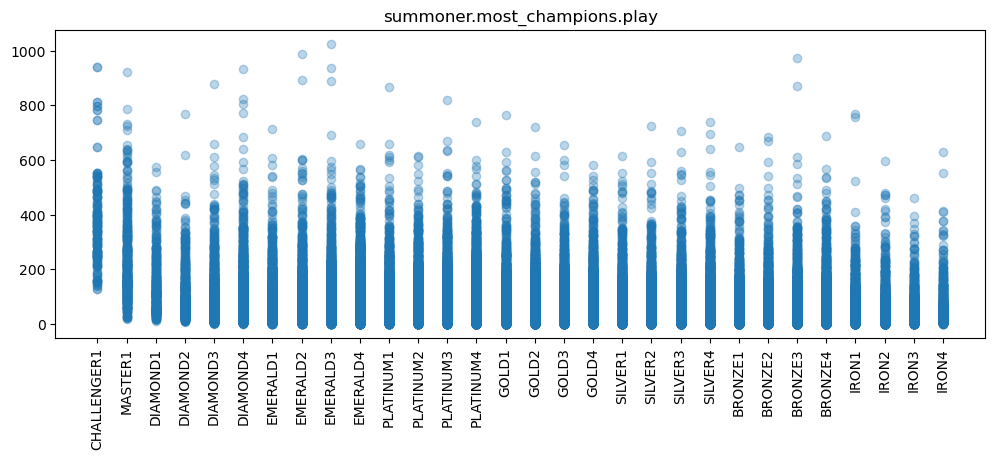

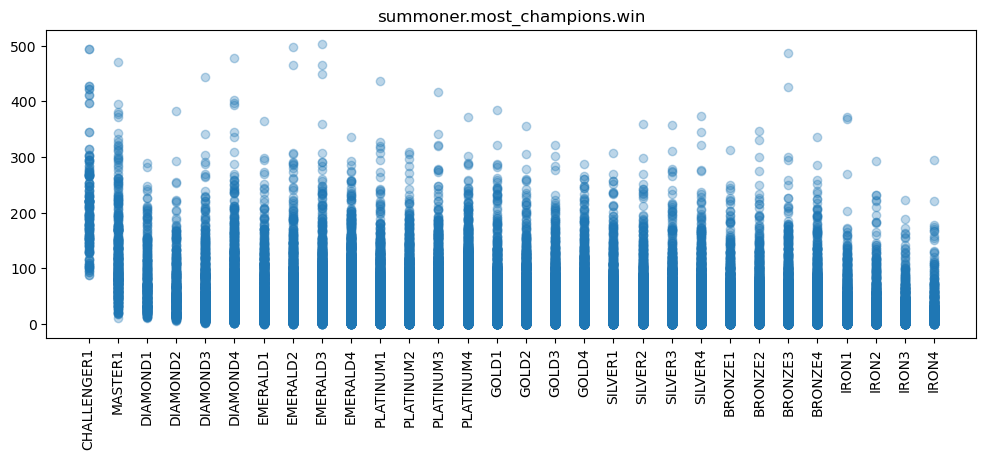

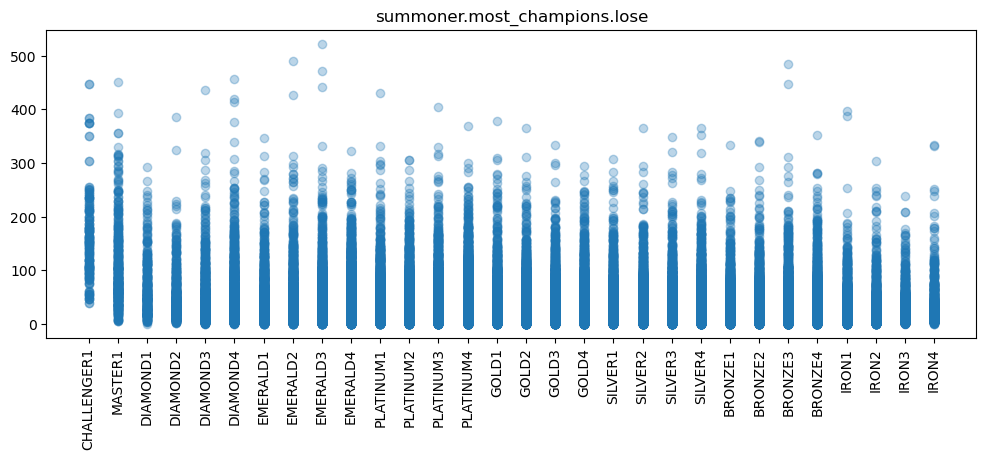

In [24]:
for col in ['summoner.most_champions.play', 'summoner.most_champions.win', 'summoner.most_champions.lose']:
    plt.figure(figsize=(12, 4))
    plt.scatter(opgg['tier'], opgg[col], alpha=0.3)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

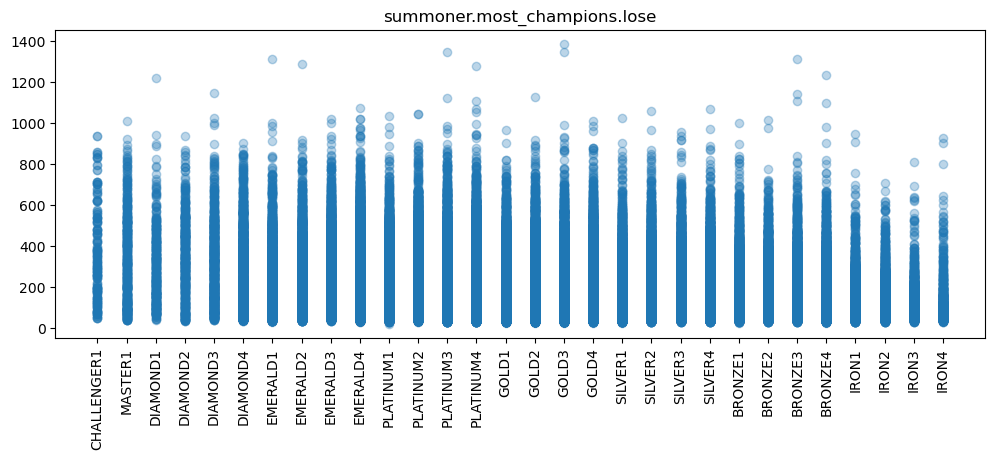

In [25]:
plt.figure(figsize=(12, 4))
plt.scatter(opgg['tier'], opgg['summoner.level'], alpha=0.3)
plt.title(col)
plt.xticks(rotation=90)
plt.show()

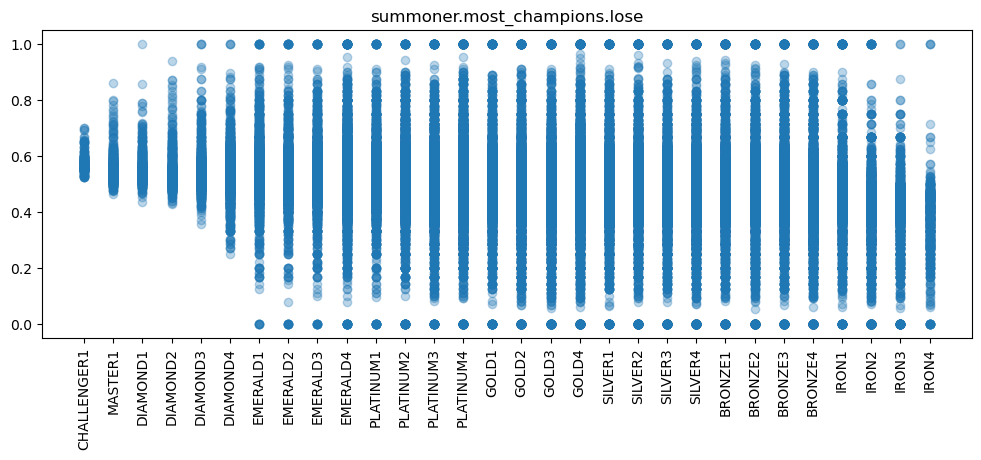

In [26]:
plt.figure(figsize=(12, 4))
plt.scatter(opgg['tier'], opgg['summoner.most_champions.win']/(opgg['summoner.most_champions.win']+opgg['summoner.most_champions.lose']), alpha=0.3)
plt.title(col)
plt.xticks(rotation=90)
plt.show()

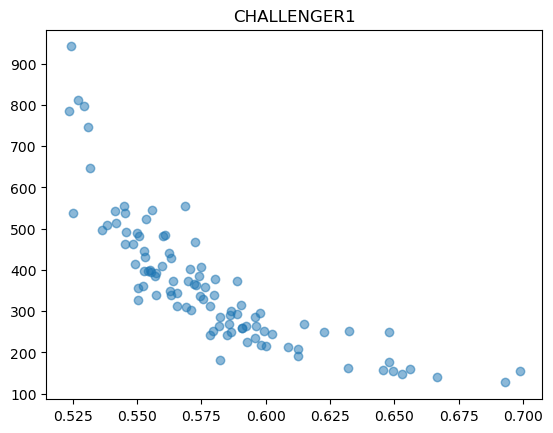

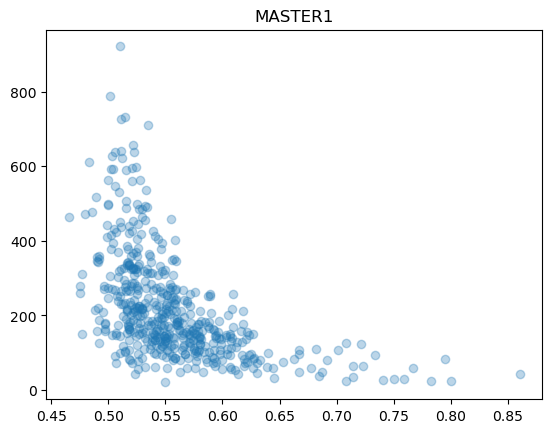

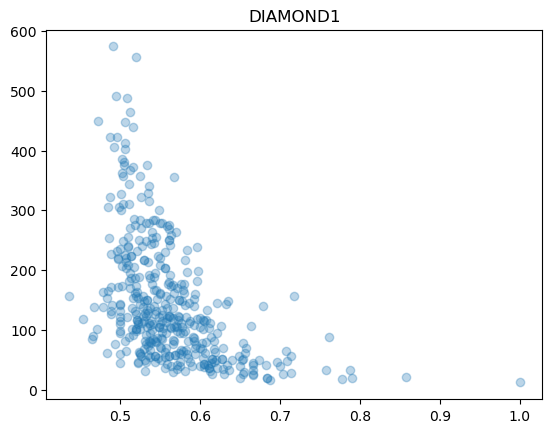

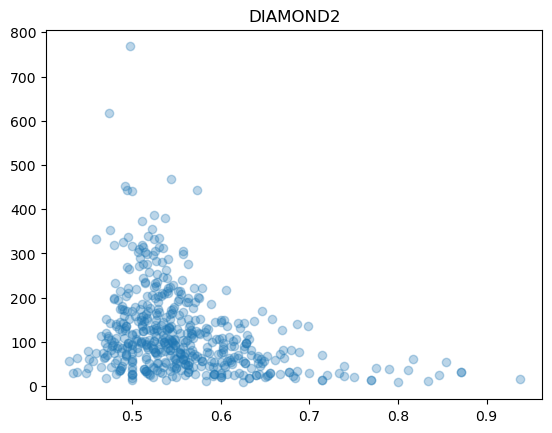

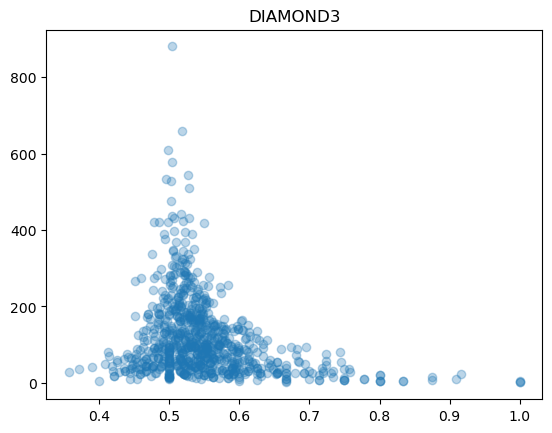

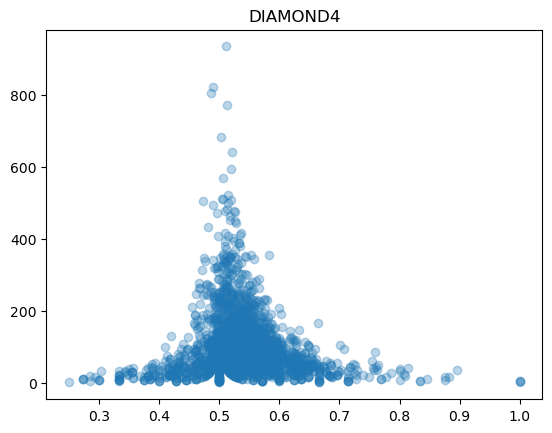

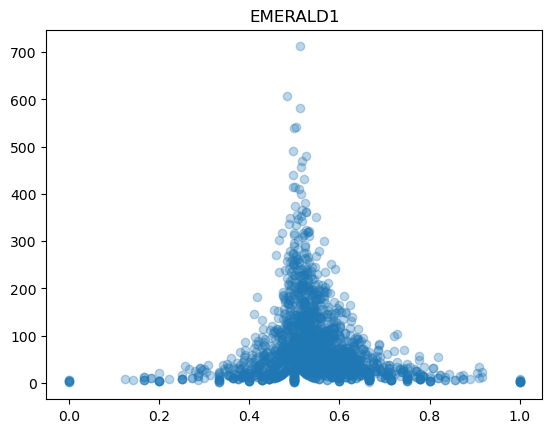

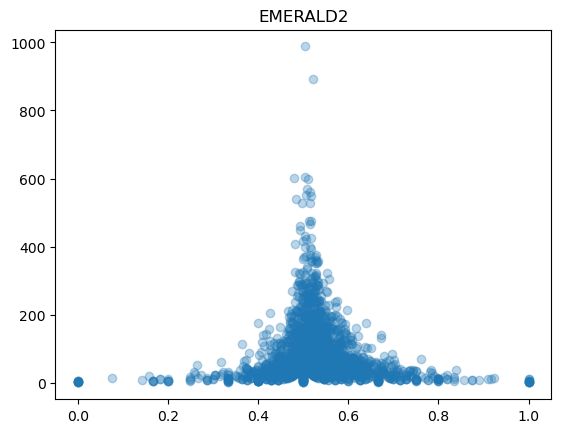

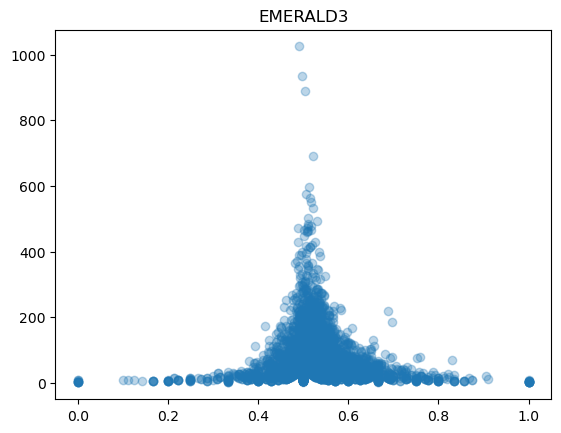

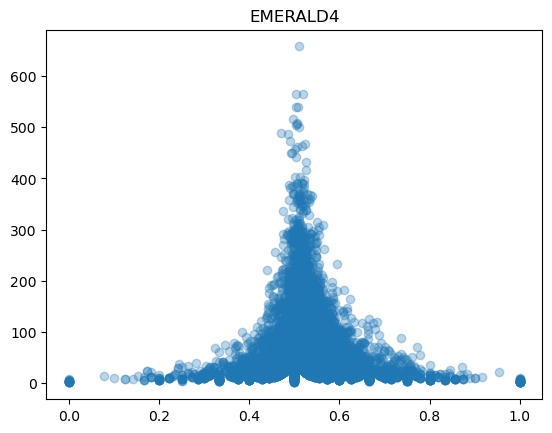

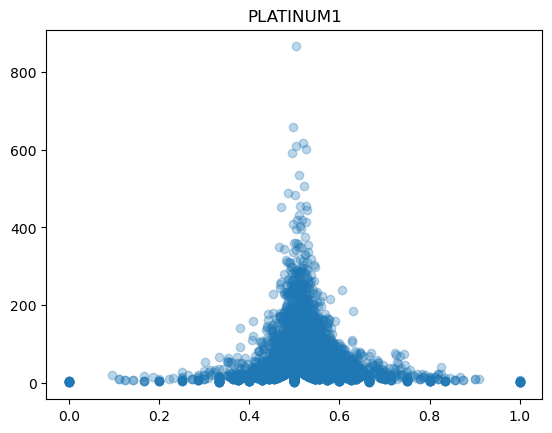

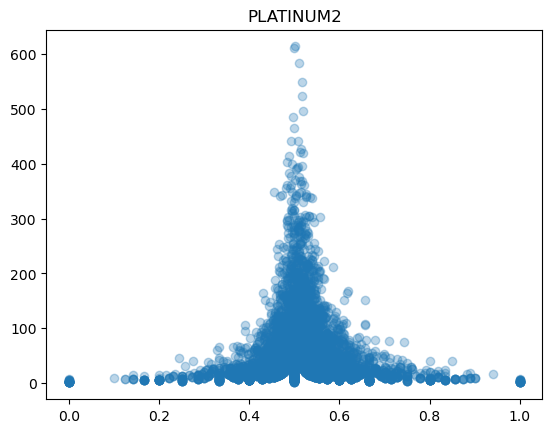

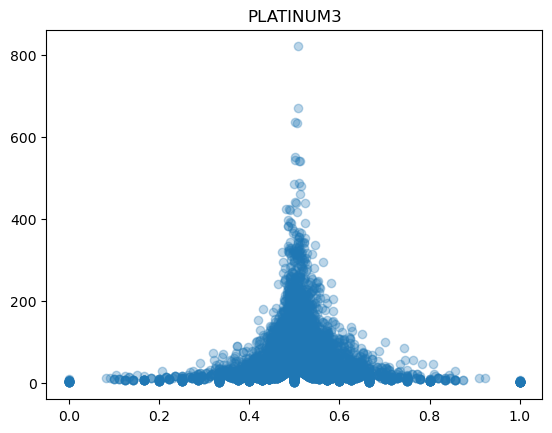

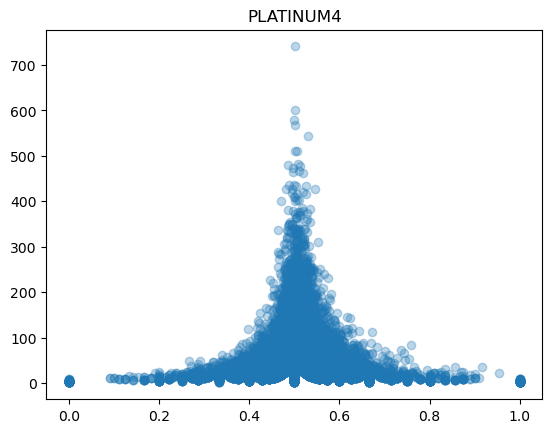

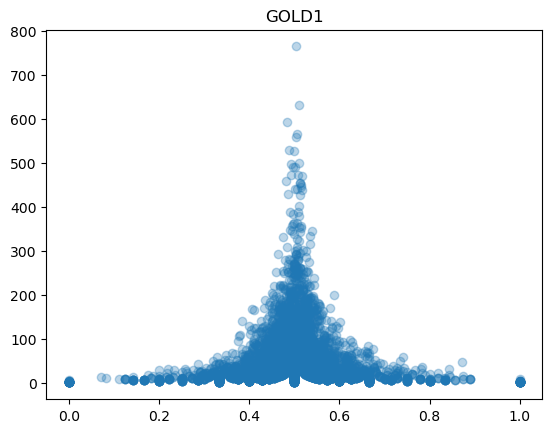

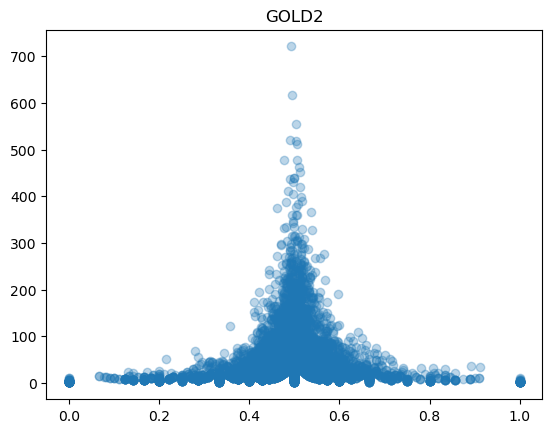

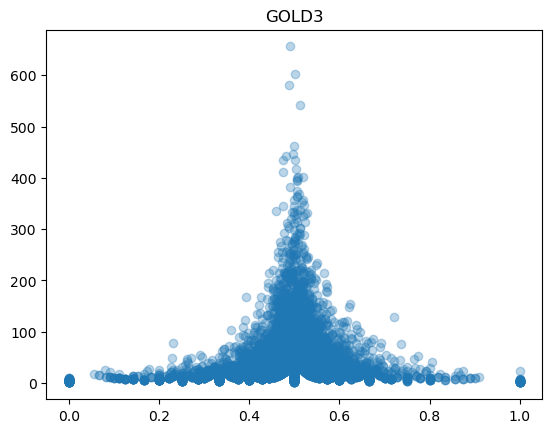

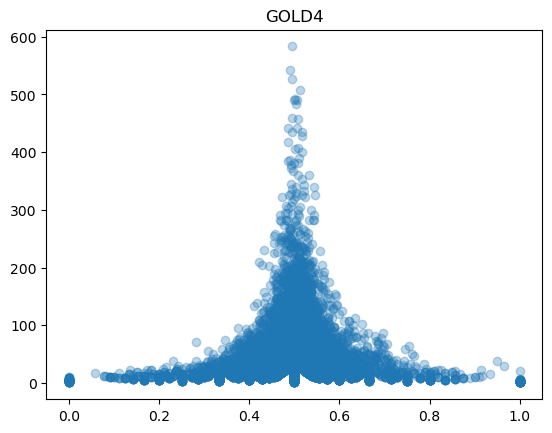

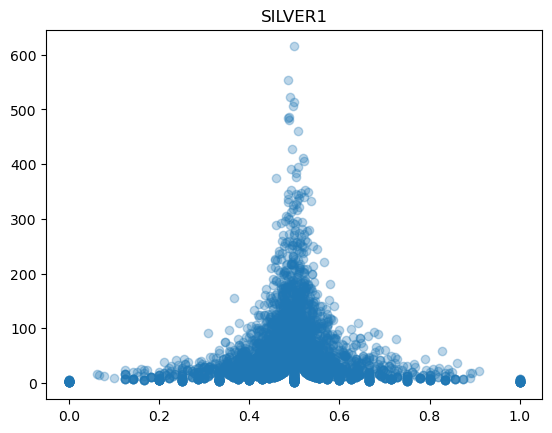

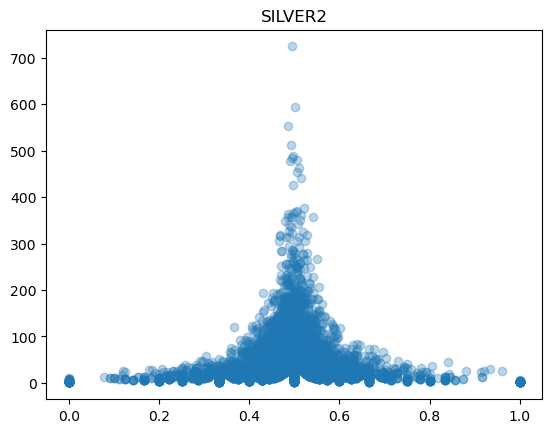

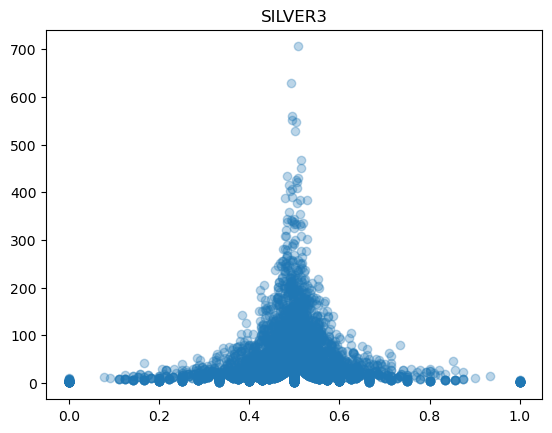

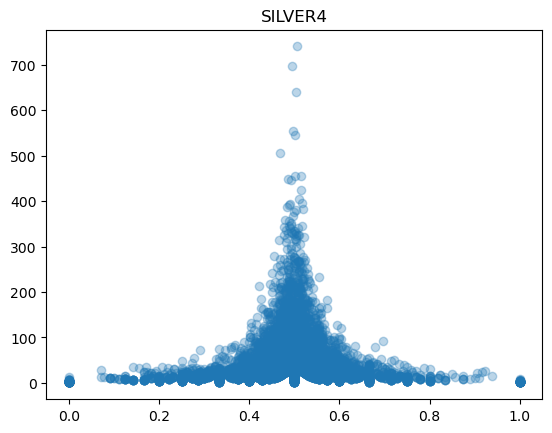

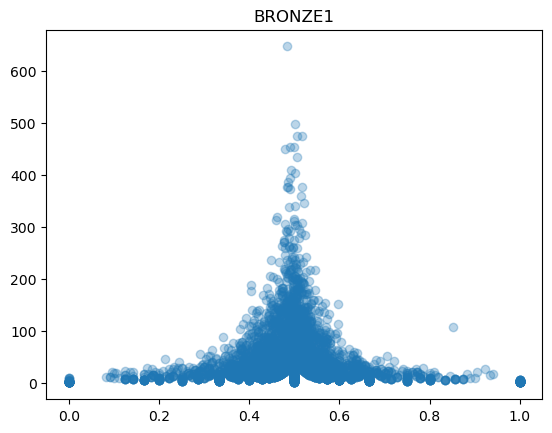

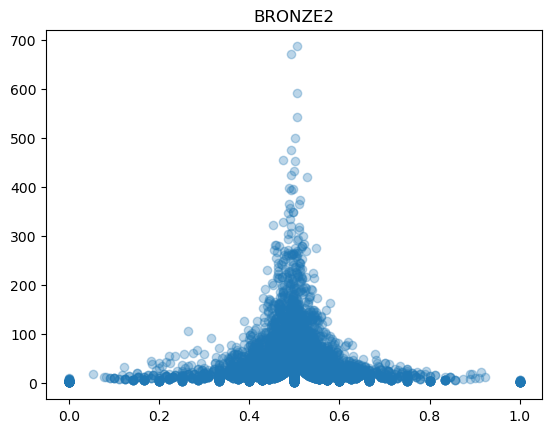

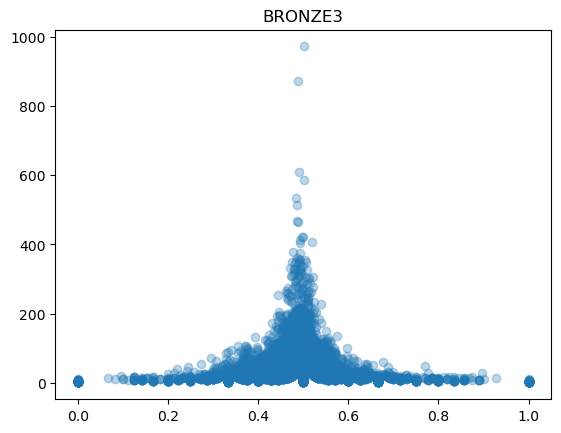

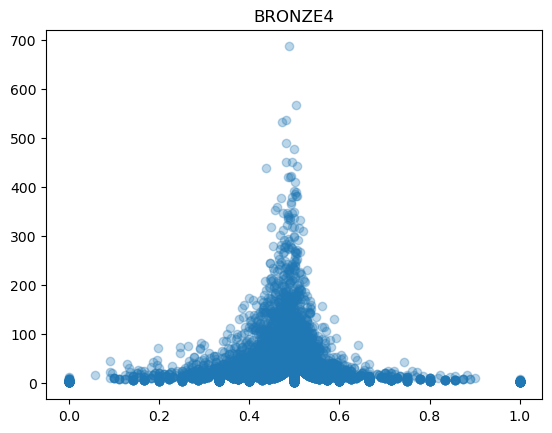

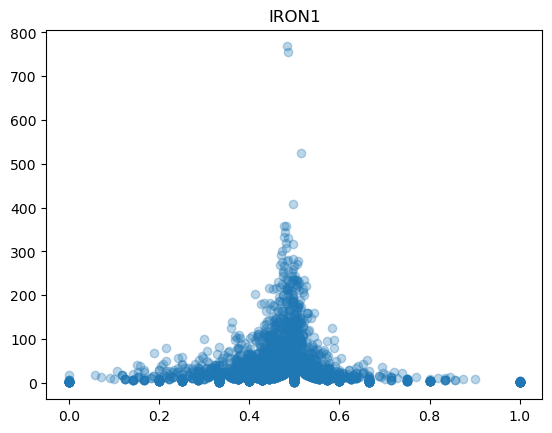

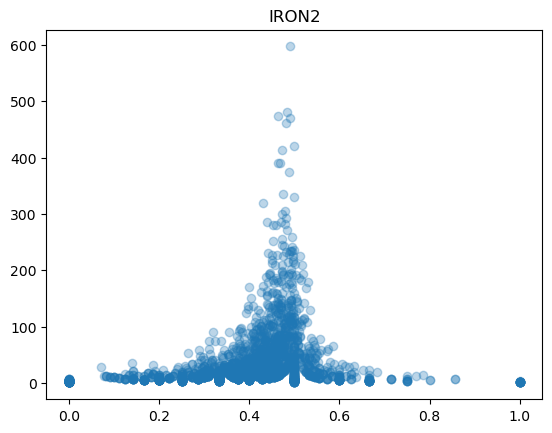

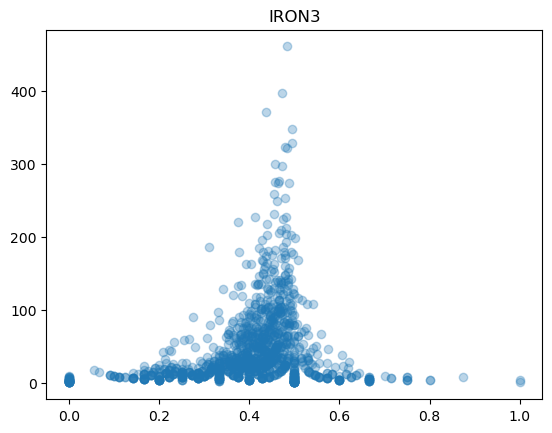

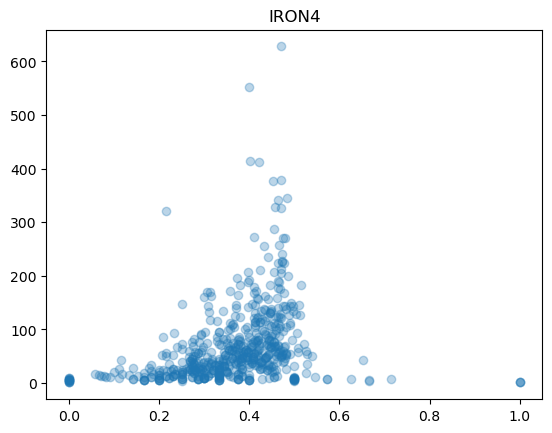

In [27]:
for tier in tier_list:
    tierDF = opgg[opgg['tier'] == tier]
    plt.scatter(tierDF['summoner.most_champions.win']/(tierDF['summoner.most_champions.win']+tierDF['summoner.most_champions.lose']), tierDF['summoner.most_champions.play'], alpha=0.3)
    plt.title(tier)
    plt.show()

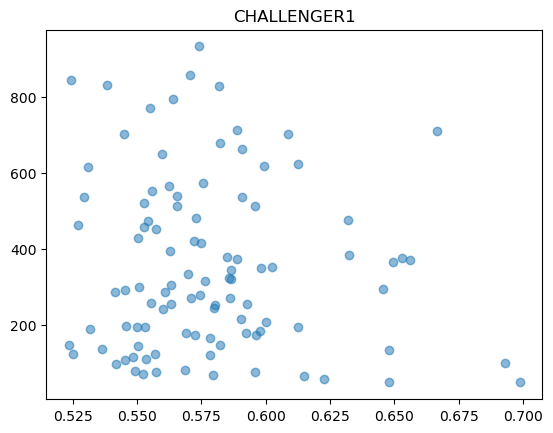

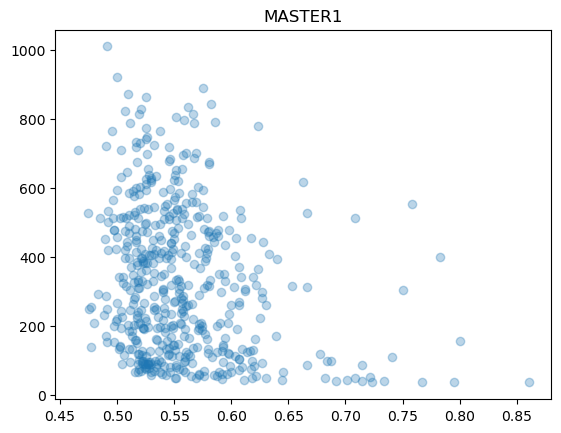

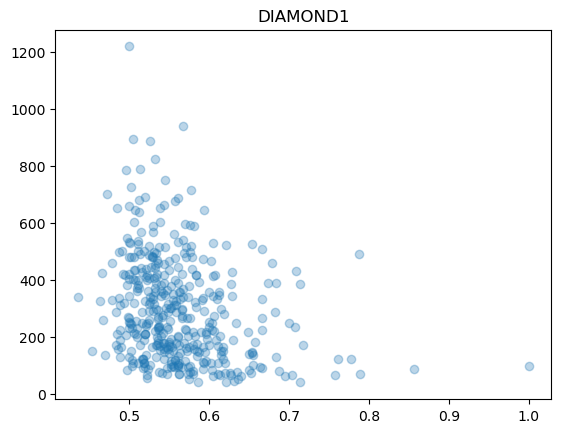

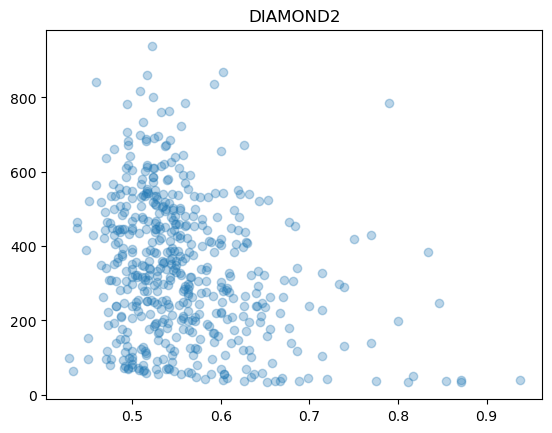

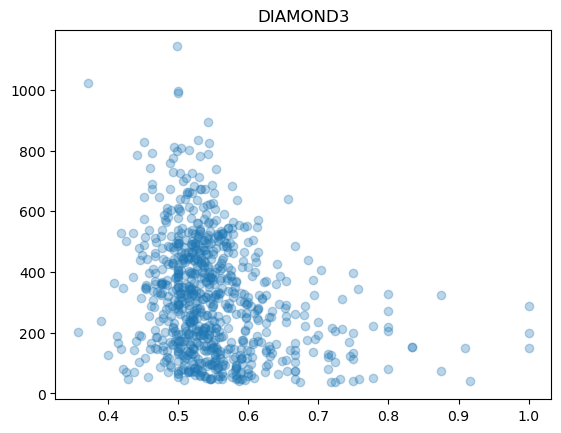

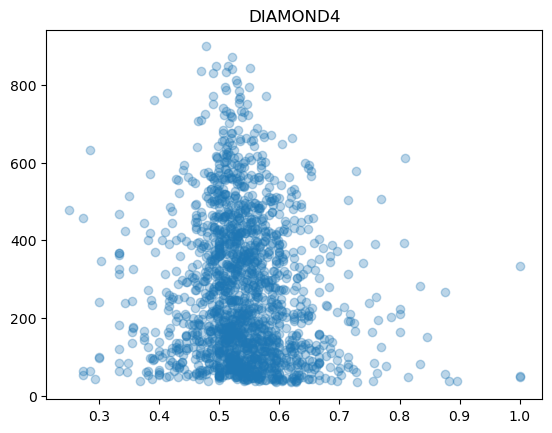

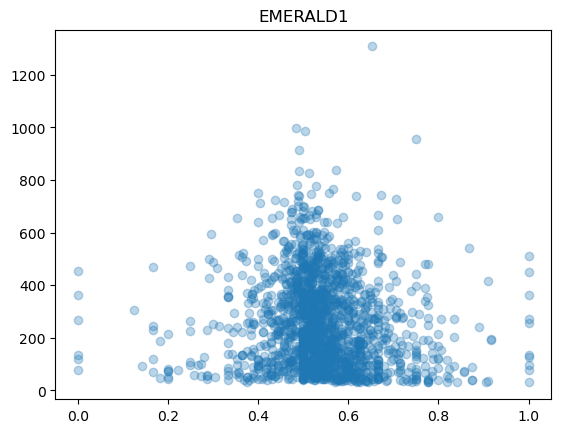

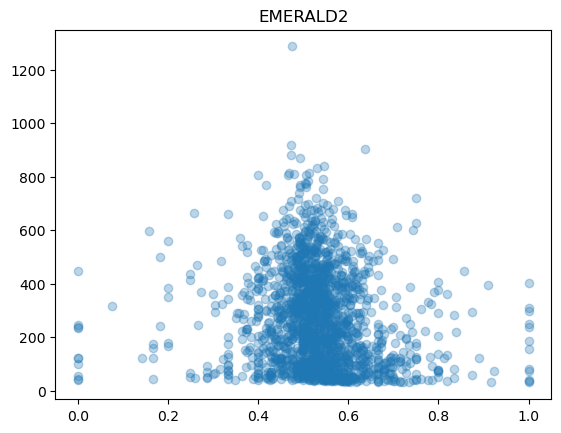

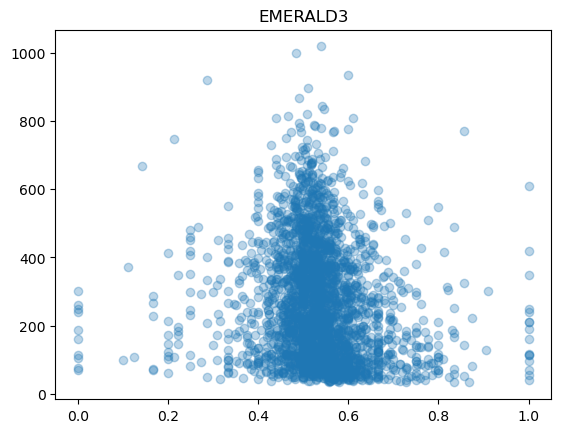

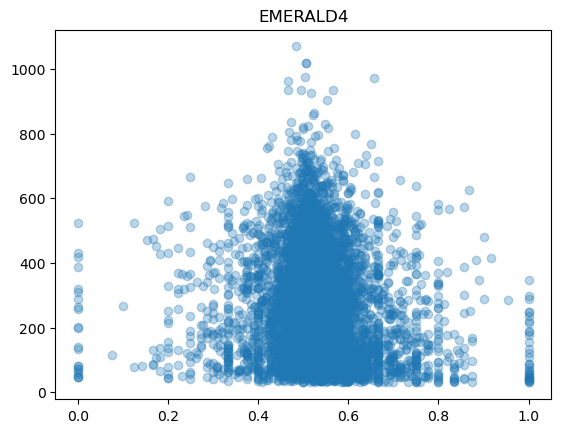

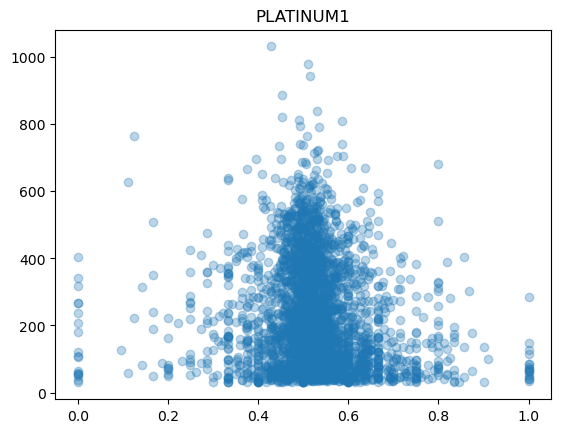

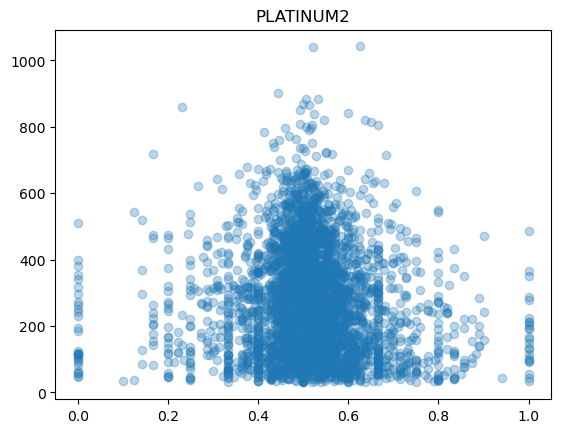

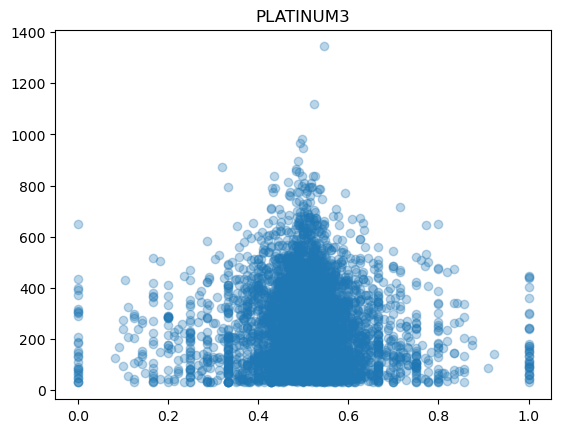

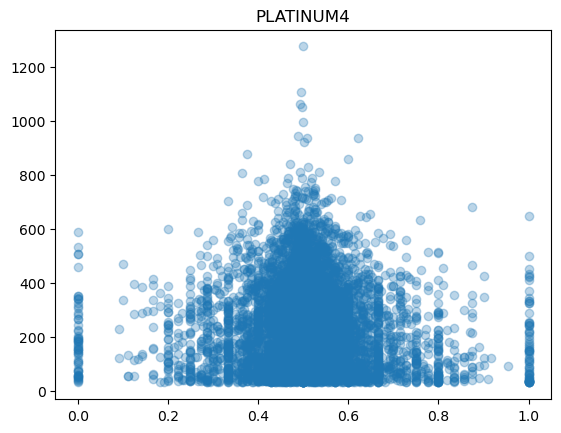

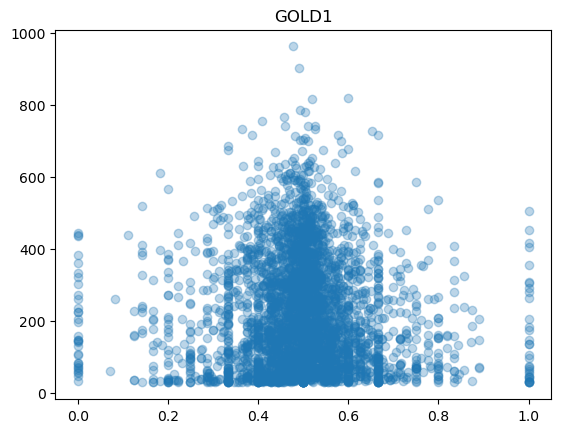

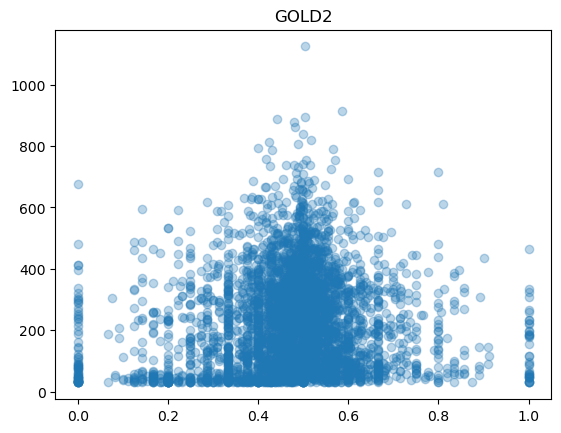

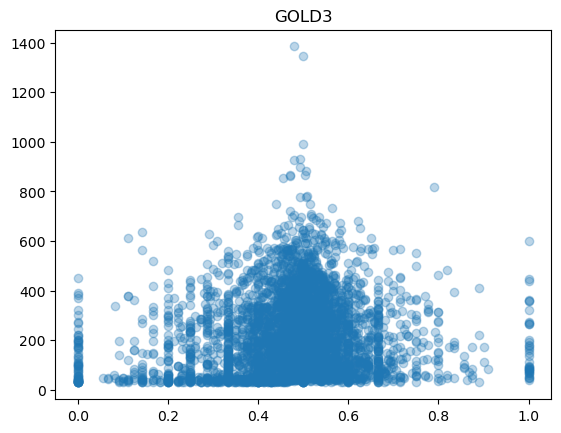

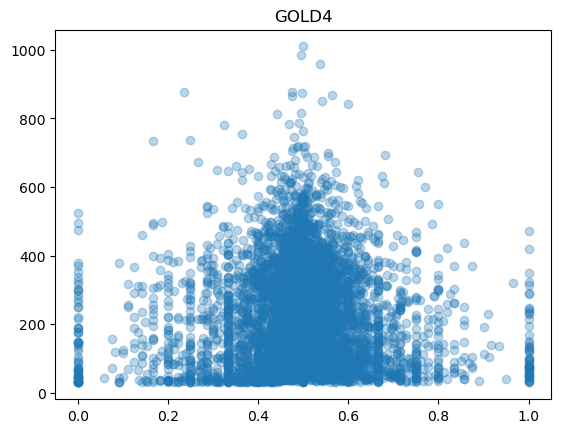

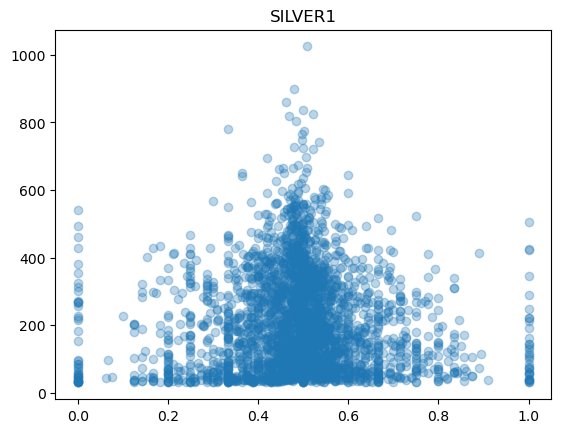

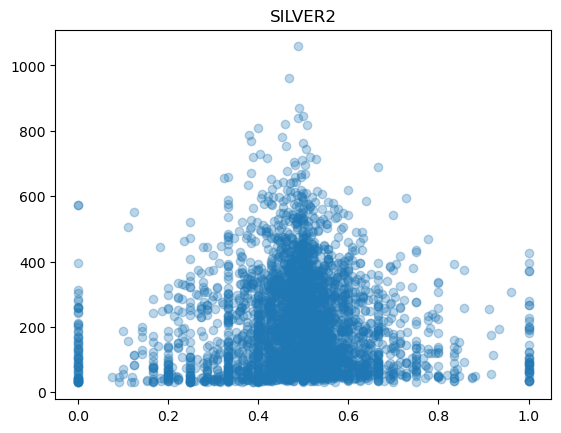

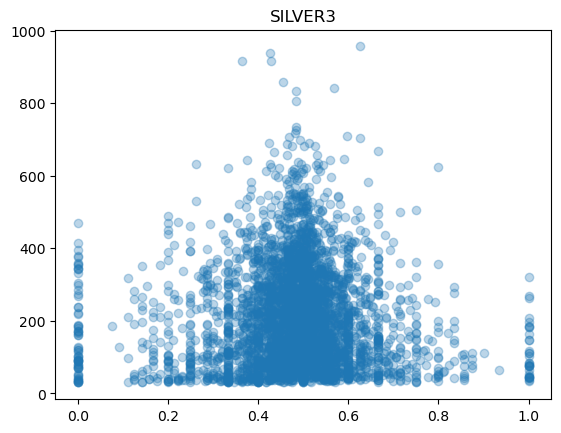

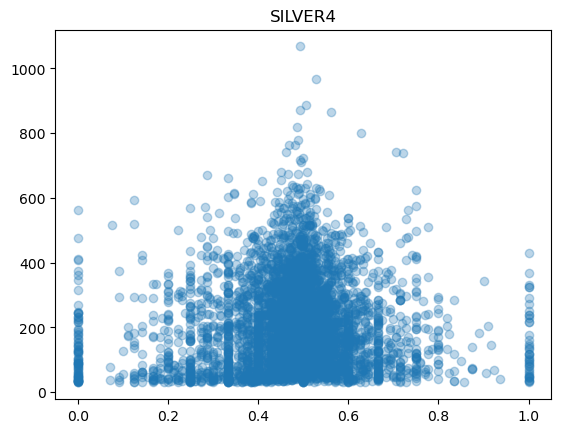

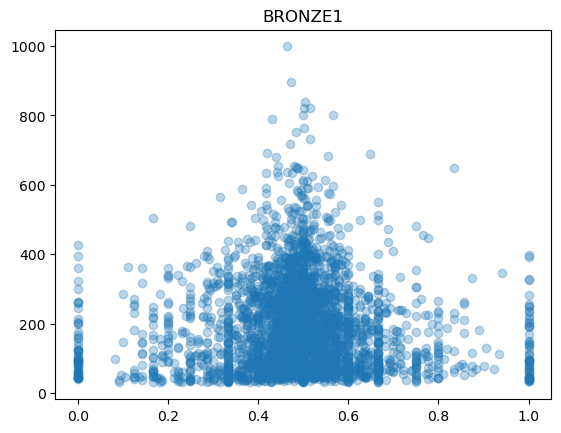

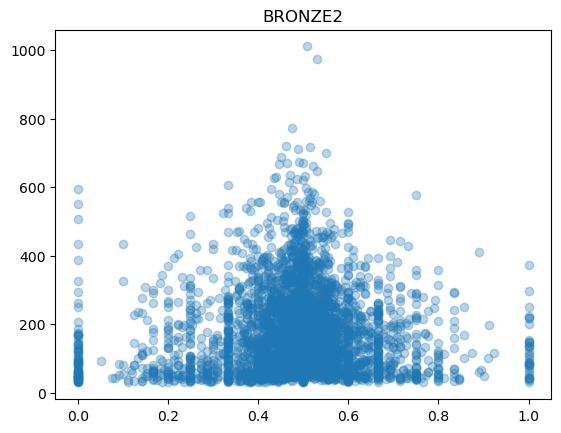

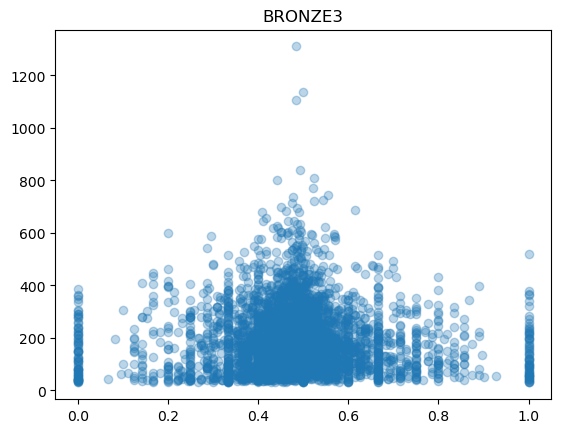

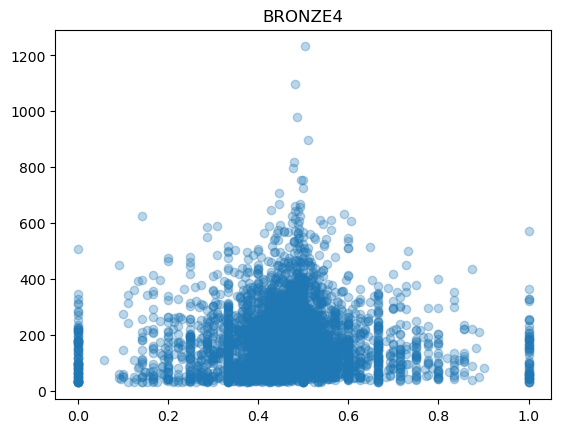

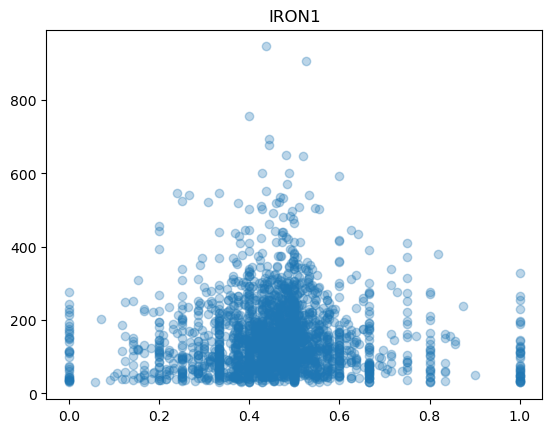

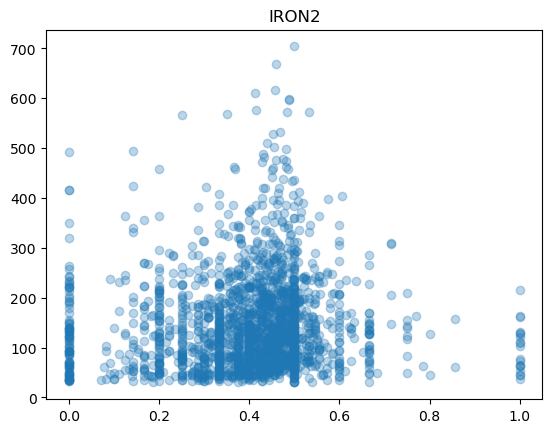

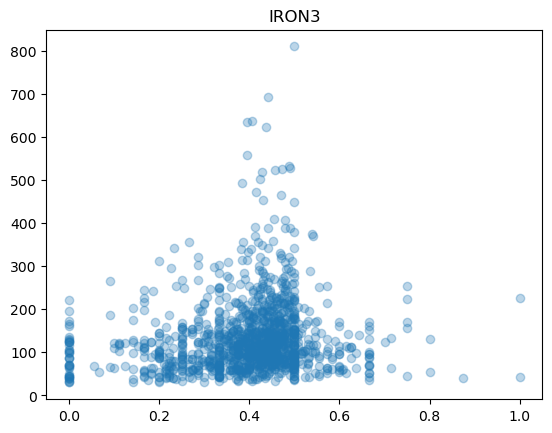

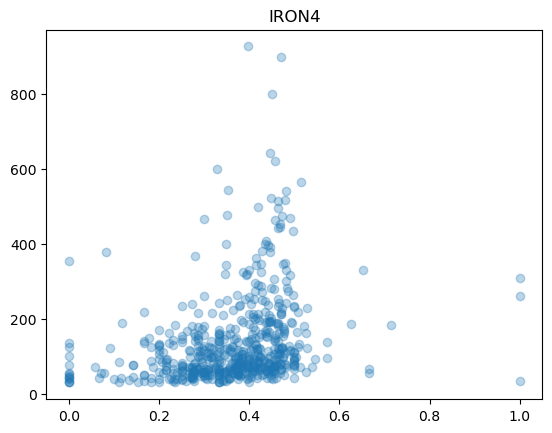

In [28]:
for tier in tier_list:
    tierDF = opgg[opgg['tier'] == tier]
    plt.scatter(tierDF['summoner.most_champions.win']/(tierDF['summoner.most_champions.win']+tierDF['summoner.most_champions.lose']), tierDF['summoner.level'], alpha=0.3)
    plt.title(tier)
    plt.show()

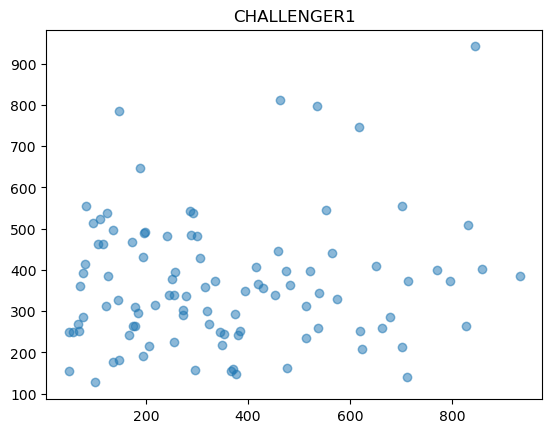

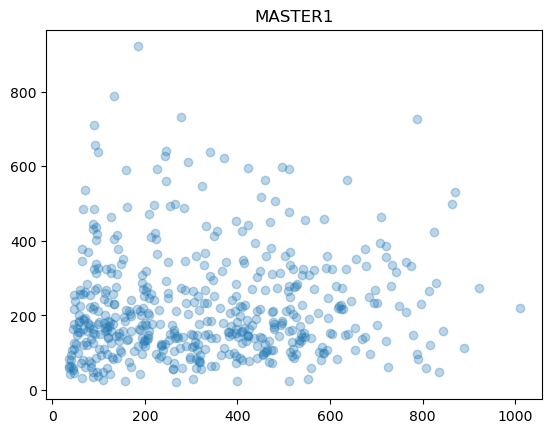

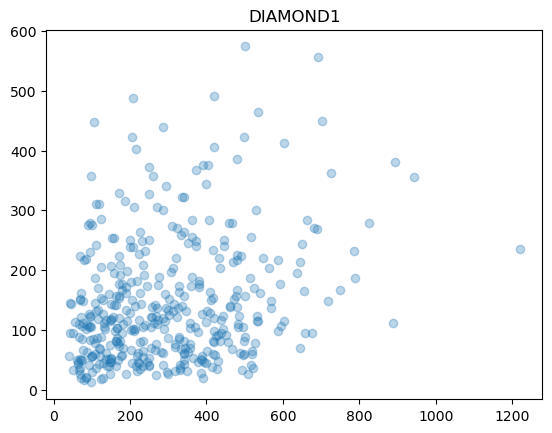

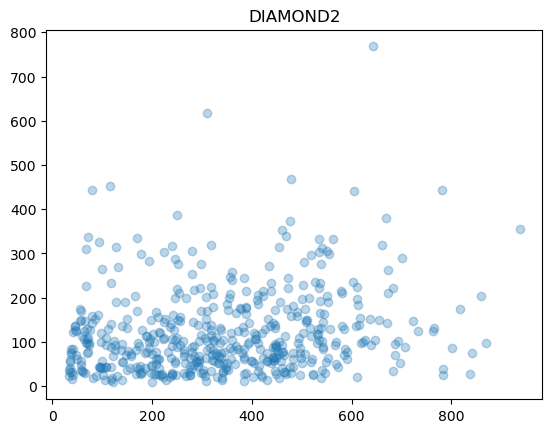

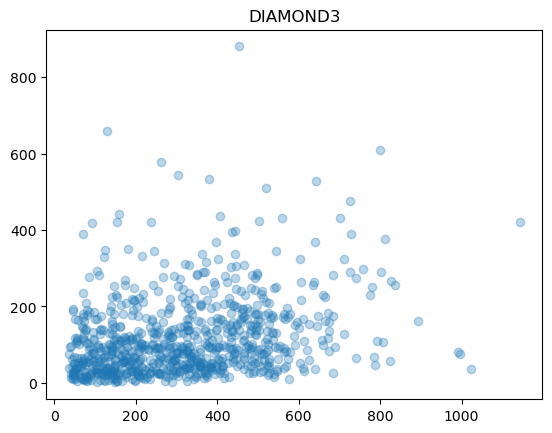

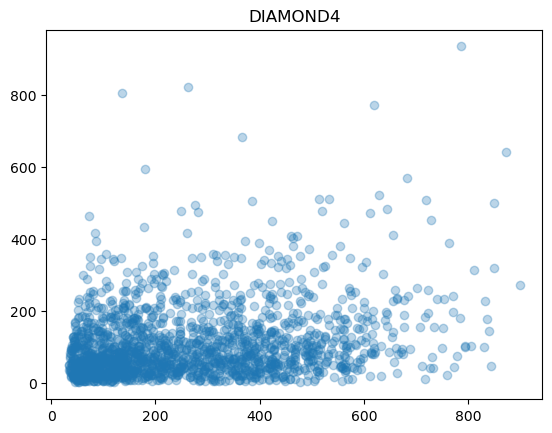

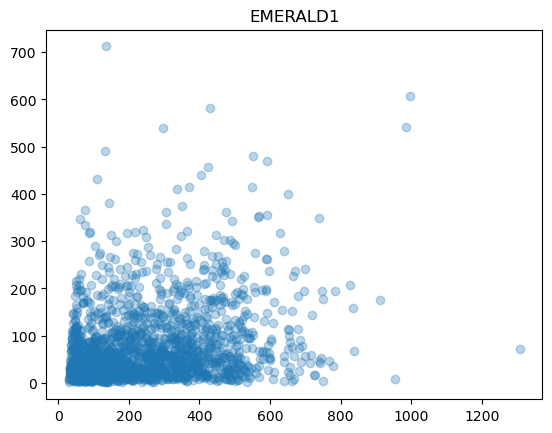

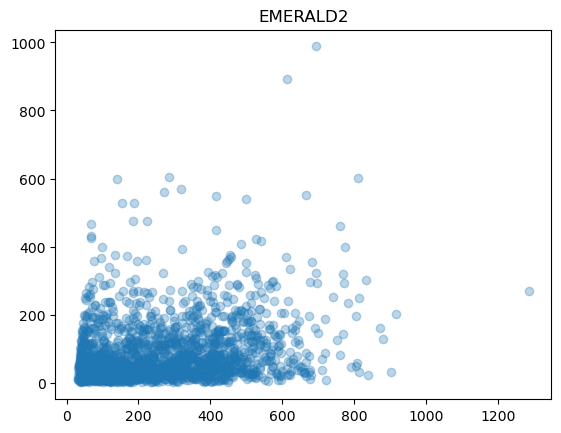

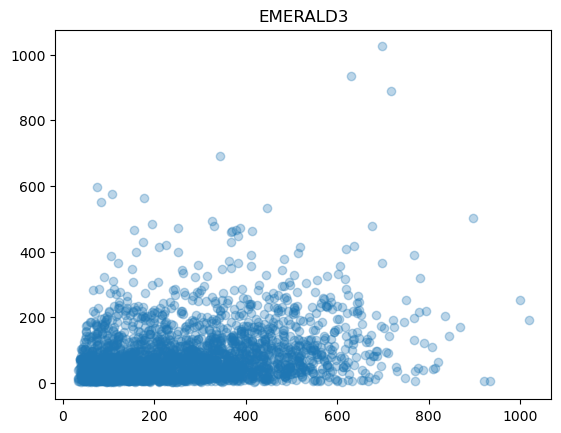

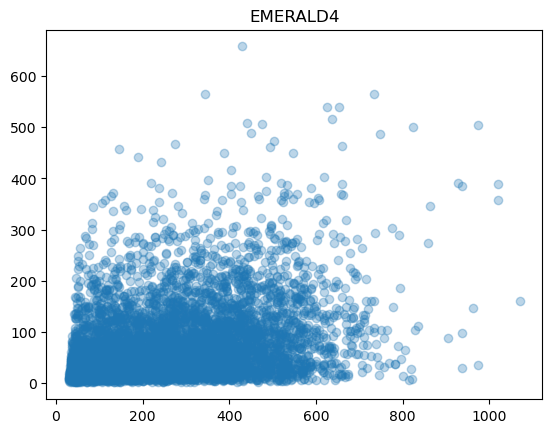

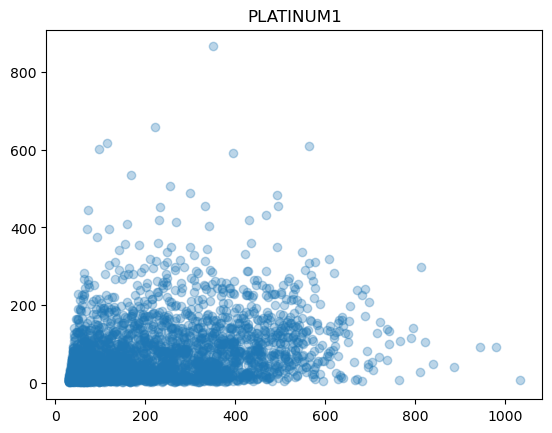

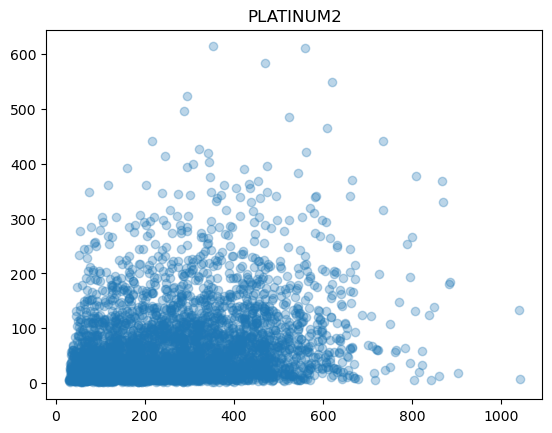

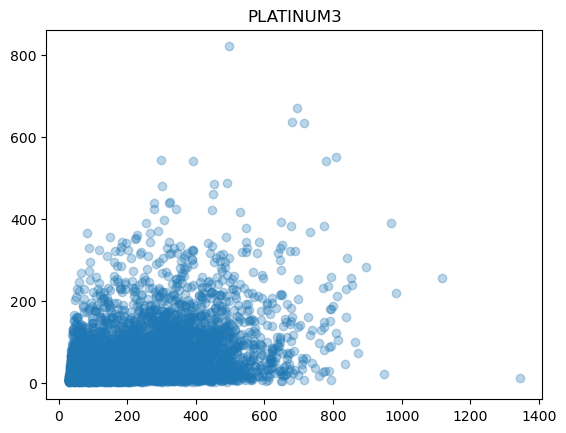

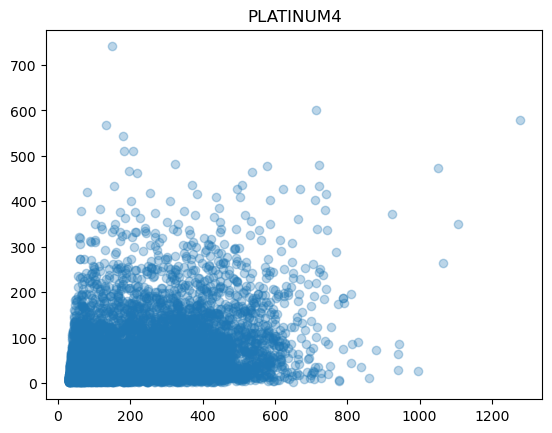

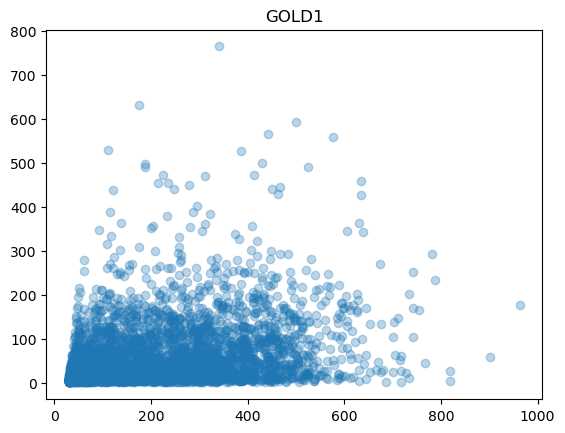

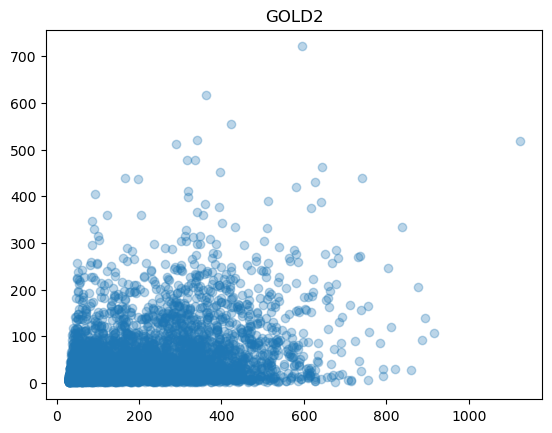

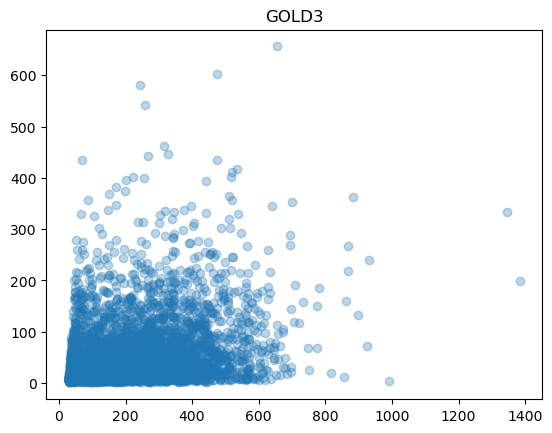

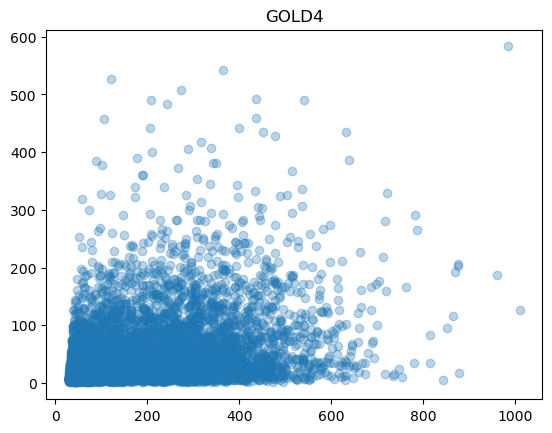

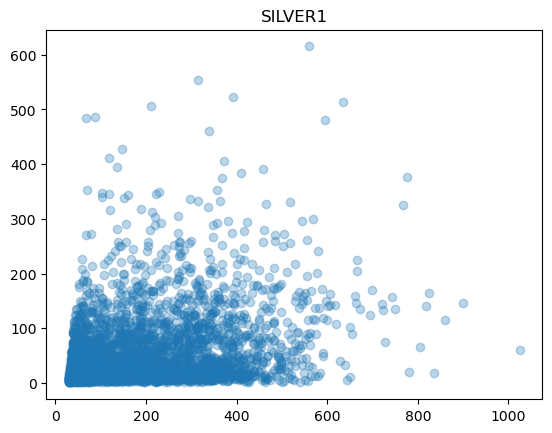

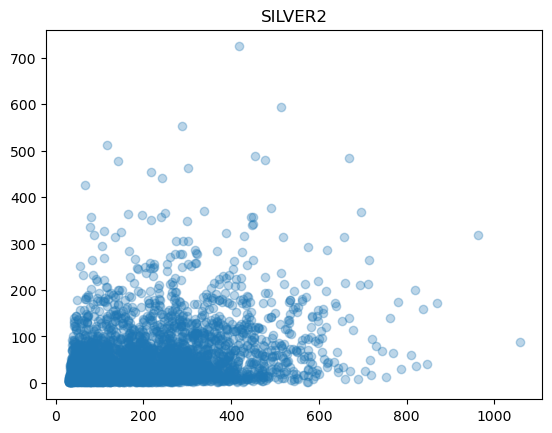

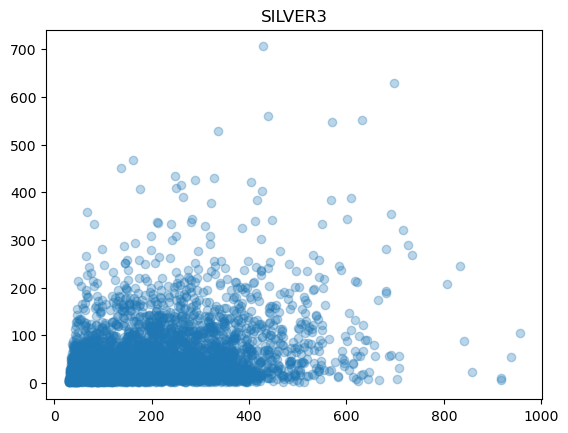

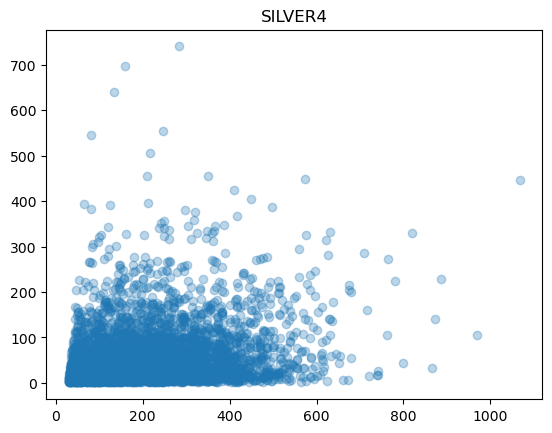

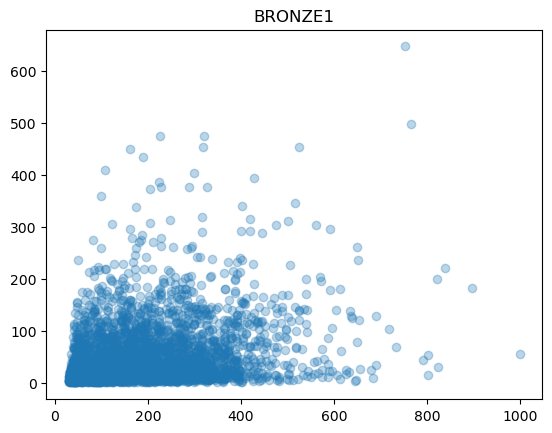

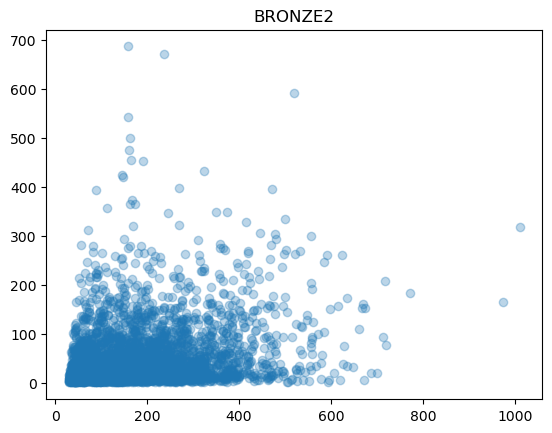

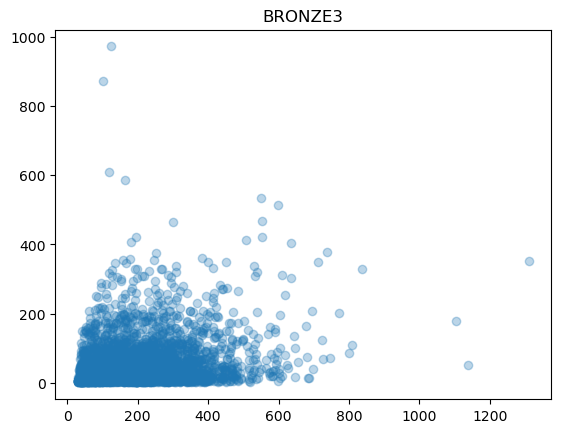

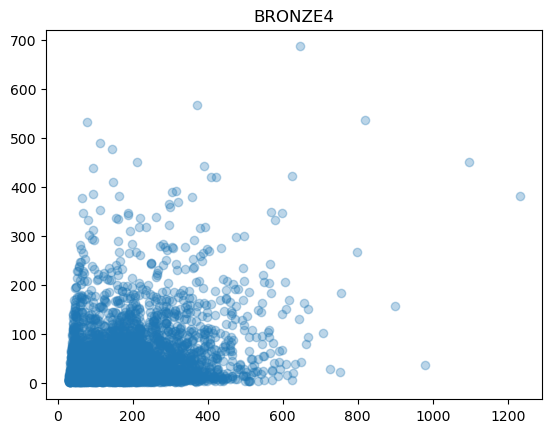

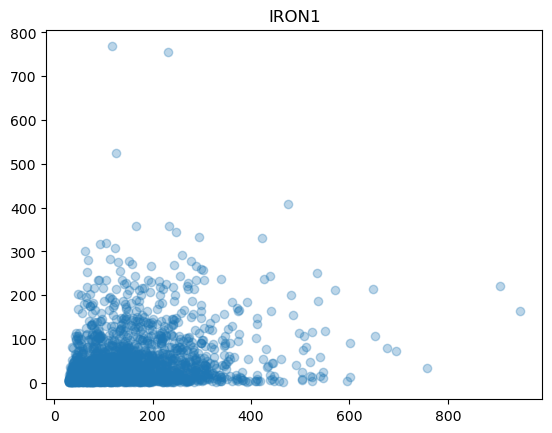

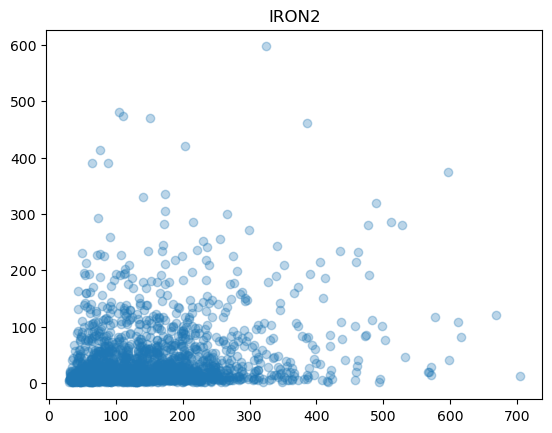

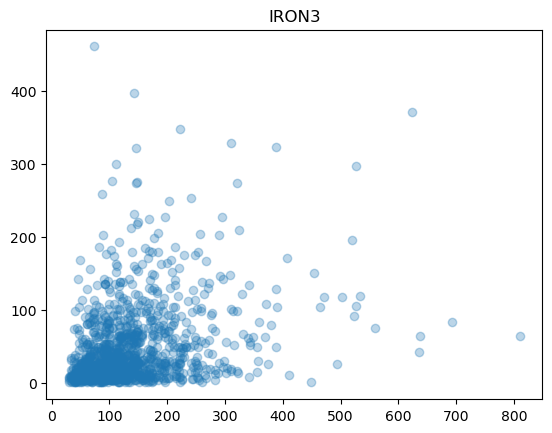

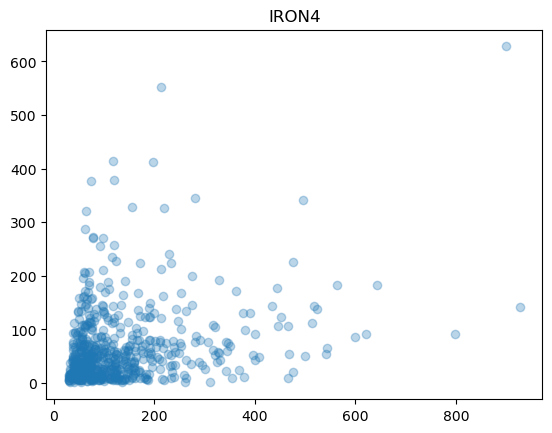

In [29]:
for tier in tier_list:
    tierDF = opgg[opgg['tier'] == tier]
    plt.scatter(tierDF['summoner.level'], tierDF['summoner.most_champions.play'], alpha=0.3)
    plt.title(tier)
    plt.show()

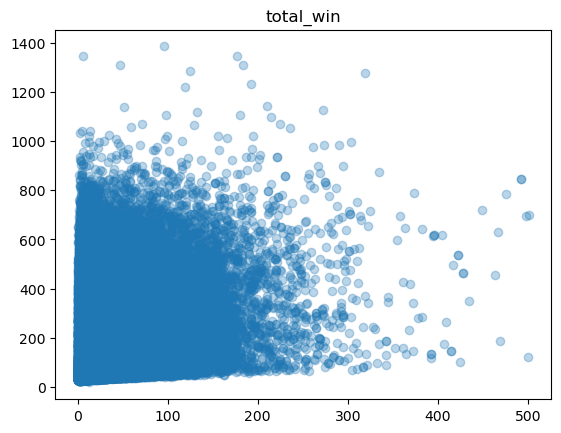

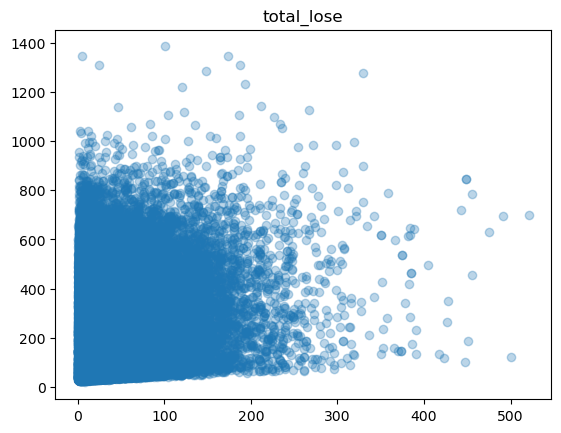

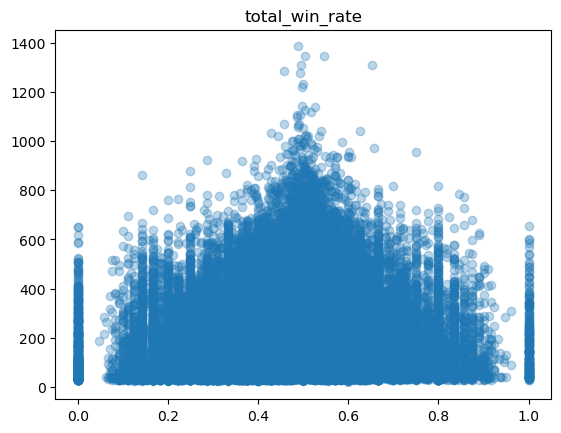

In [30]:
for col in ['total_win', 'total_lose', 'total_win_rate']:
    plt.scatter(opgg[col], opgg['summoner.level'], alpha=0.3)
    plt.title(col)
    plt.show()

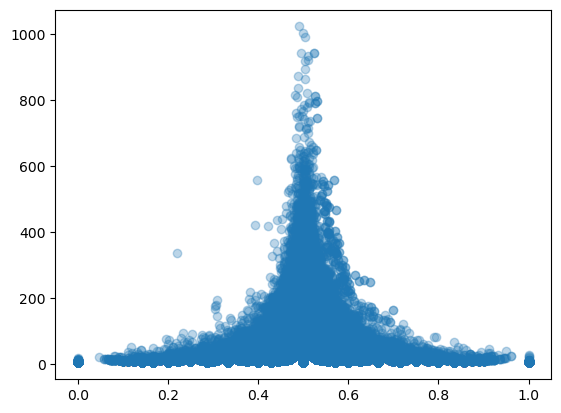

In [31]:
plt.scatter(opgg['total_win_rate'], opgg['total_win']+opgg['total_lose'], alpha=0.3)
plt.show()

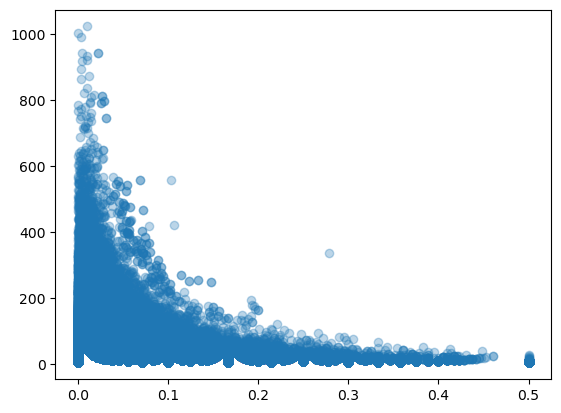

In [32]:
# plt.scatter(abs(0.5-opgg['total_win_rate']), opgg['total_win']+opgg['total_lose'], alpha=0.3)
# plt.show()

In [33]:
# totalPlayDF = (opgg['total_win'] + opgg['total_lose'])

In [34]:
# (opgg['total_win'] + opgg['total_lose']).describe()

count    88128.000000
mean        57.732367
std         72.262262
min          5.000000
25%         13.000000
50%         31.000000
75%         74.000000
max       1022.000000
dtype: float64

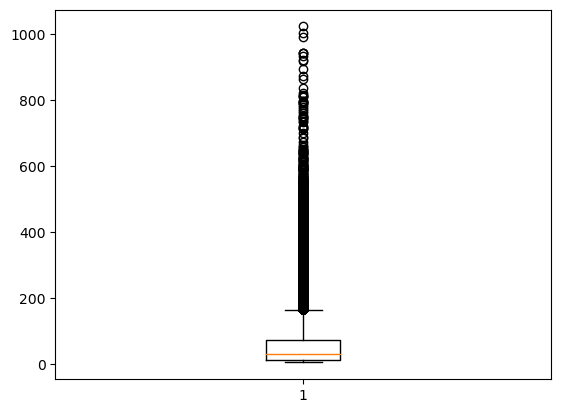

In [35]:
# plt.boxplot((opgg['total_win'] + opgg['total_lose']))
# plt.show()

In [36]:
# totalPlayDF.value_counts()

5      4167
6      3227
7      2891
8      2726
9      2403
       ... 
466       1
989       1
536       1
603       1
625       1
Name: count, Length: 622, dtype: int64

In [37]:
# opgg['total_play'] = totalPlayDF

In [39]:
# opgg[opgg['total_play'] > 74]['total_play'].describe()

count    21953.000000
mean       153.219788
std         87.947055
min         75.000000
25%         95.000000
50%        125.000000
75%        179.000000
max       1022.000000
Name: total_play, dtype: float64

In [42]:
# under75 = opgg[opgg['total_play'] <= 74]

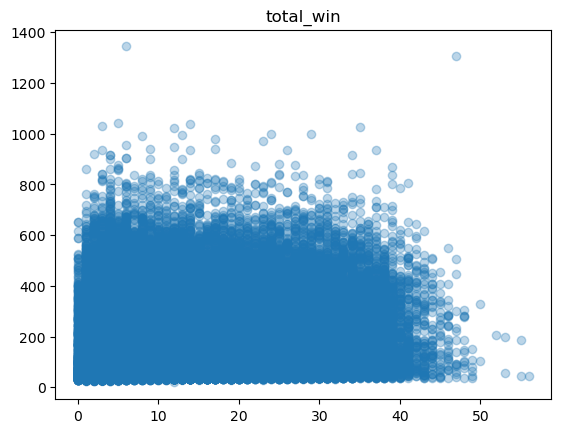

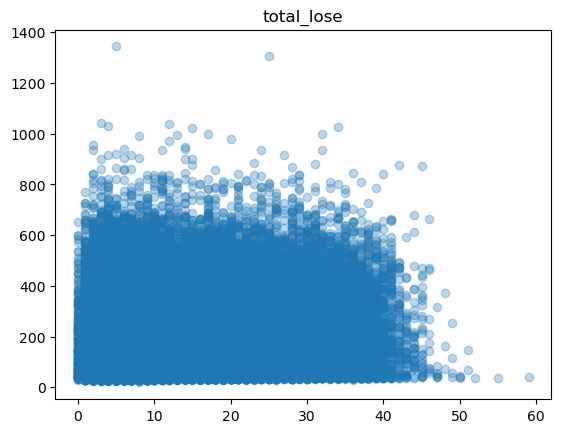

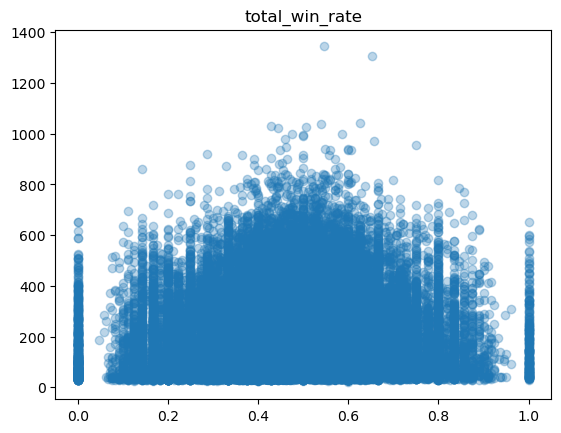

In [43]:
# for col in ['total_win', 'total_lose', 'total_win_rate']:
#     plt.scatter(under75[col], under75['summoner.level'], alpha=0.3)
#     plt.title(col)
#     plt.show()

In [ ]:
pd.json_normalize(opgg['summoner.most_champions.champion_stats'])